# Veri Bilimi Proje


In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
#import plotly.graph_objects as go

df = pd.read_csv("ibb-yags-verileri-2011-21.csv",sep=';',encoding='latin-1')

# İstanbul Barajlara Düşen Yağış Verileri 

In [244]:
df.head(10)#tablo yazdırıldı

Tarih Ömerli Darlik Elmali Terkos B.çekmece Sazlidere Alibey  \
0   1.01.2011      0      0      0      0         0         0      0   
1   2.01.2011      0      0      0      0         0         0      0   
2   3.01.2011      0      0      0   0,42      1,37      0,87    0,2   
3   4.01.2011   8,08  10,01  11,64  18,82      9,64     14,72   13,5   
4   5.01.2011   2,78   8,48   7,09   3,42      0,83      4,31    4,3   
5   6.01.2011      0   0,78      0   0,42         0         0   0,56   
6   7.01.2011      0   3,05    0,7   9,11         0      0,64   3,37   
7   8.01.2011      0      0      0      0         0         0      0   
8   9.01.2011      0      0      0      0         0         0      0   
9  10.01.2011      0      0      0      0         0         0      0   

  Kazandere Pabuçdere  
0         0         0  
1         0         0  
2      2,26      1,89  
3       8,2     10,37  
4      1,44       1,6  
5      1,15      1,11  
6      1,25       1,6  
7         0         0  
8         0         0  
9         0         0

In [245]:
df.shape#satır ve sütun bilgisi alındı

(3723, 10)

In [246]:
df.columns

Index(['Tarih', 'Ömerli', 'Darlik', 'Elmali', 'Terkos', 'B.çekmece',
       'Sazlidere', 'Alibey', 'Kazandere', 'Pabuçdere'],
      dtype='object')

In [247]:
df.dtypes

Tarih        object
Ömerli       object
Darlik       object
Elmali       object
Terkos       object
B.çekmece    object
Sazlidere    object
Alibey       object
Kazandere    object
Pabuçdere    object
dtype: object

In [248]:
df.isnull().sum()

Tarih        0
Ömerli       0
Darlik       0
Elmali       0
Terkos       0
B.çekmece    0
Sazlidere    0
Alibey       0
Kazandere    0
Pabuçdere    0
dtype: int64

In [249]:
df.nunique()

Tarih        3723
Ömerli        504
Darlik        690
Elmali        674
Terkos        731
B.çekmece     579
Sazlidere     654
Alibey        660
Kazandere     648
Pabuçdere     615
dtype: int64

In [250]:
type(df["Tarih"].loc[0])

str

In [251]:
df.tail()

Tarih Ömerli Darlik Elmali Terkos B.çekmece Sazlidere Alibey  \
3718   7.03.2021  10,93  13,44  11,33   17,8      14,4       6,5   10,4   
3719   8.03.2021   0,33      0      0      0       0,2         0    0,4   
3720   9.03.2021      0      0      0      0         0         0      0   
3721  10.03.2021      0      0      0      0         0         0      0   
3722  11.03.2021    8,8    8,5    6,2   11,4       7,4       6,1    7,2   

     Kazandere Pabuçdere  
3718      23,4     20,86  
3719         0         0  
3720         0         0  
3721         0         0  
3722       5,4      5,82

In [252]:
data=df.copy()

In [253]:
data.shape

(3723, 10)

In [254]:
for i,date in enumerate(df["Tarih"],0):
    df["Tarih"].iloc[i] = pd.to_datetime(date)

In [255]:
df.head()

Tarih Ömerli Darlik Elmali Terkos B.çekmece Sazlidere Alibey  \
0  2011-01-01 00:00:00      0      0      0      0         0         0      0   
1  2011-02-01 00:00:00      0      0      0      0         0         0      0   
2  2011-03-01 00:00:00      0      0      0   0,42      1,37      0,87    0,2   
3  2011-04-01 00:00:00   8,08  10,01  11,64  18,82      9,64     14,72   13,5   
4  2011-05-01 00:00:00   2,78   8,48   7,09   3,42      0,83      4,31    4,3   

  Kazandere Pabuçdere  
0         0         0  
1         0         0  
2      2,26      1,89  
3       8,2     10,37  
4      1,44       1,6

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tarih      3723 non-null   object
 1   Ömerli     3723 non-null   object
 2   Darlik     3723 non-null   object
 3   Elmali     3723 non-null   object
 4   Terkos     3723 non-null   object
 5   B.çekmece  3723 non-null   object
 6   Sazlidere  3723 non-null   object
 7   Alibey     3723 non-null   object
 8   Kazandere  3723 non-null   object
 9   Pabuçdere  3723 non-null   object
dtypes: object(10)
memory usage: 291.0+ KB


In [257]:
floor_rate=df[["Tarih","Ömerli"]]
floor_rate

Tarih Ömerli
0     2011-01-01 00:00:00      0
1     2011-02-01 00:00:00      0
2     2011-03-01 00:00:00      0
3     2011-04-01 00:00:00   8,08
4     2011-05-01 00:00:00   2,78
...                   ...    ...
3718  2021-07-03 00:00:00  10,93
3719  2021-08-03 00:00:00   0,33
3720  2021-09-03 00:00:00      0
3721  2021-10-03 00:00:00      0
3722  2021-11-03 00:00:00    8,8

[3723 rows x 2 columns]

In [258]:
floor_rate["Ömerli"].max()

'9,98'

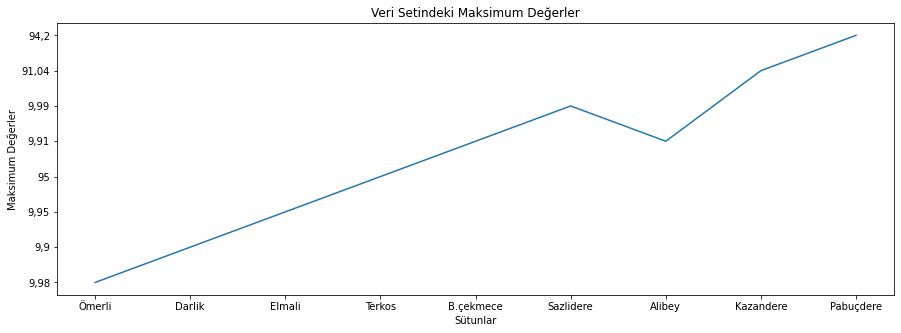

In [259]:
max_deger = df.max()[1:]
plt.figure(figsize = (15,5))

drop_columns = ['Tarih']
df_filtered = df[[col for col in df.columns if col not in drop_columns]]

plt.plot(max_deger)
plt.title("Veri Setindeki Maksimum Değerler")
plt.xlabel("Sütunlar")
plt.ylabel("Maksimum Değerler")
plt.show()

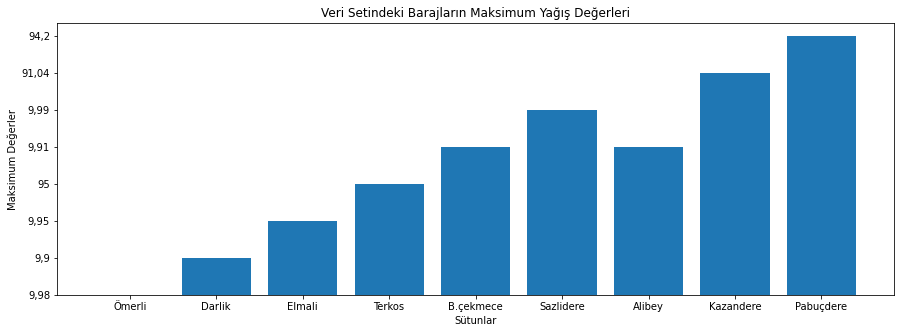

In [260]:
max_deger = df.max()[1:] 
plt.figure(figsize = (15,5))

# Grafik çiz
plt.bar(max_deger.index, max_deger.values)
plt.title("Veri Setindeki Barajların Maksimum Yağış Değerleri")
plt.xlabel("Sütunlar")
plt.ylabel("Maksimum Değerler")
plt.show()

In [261]:

# Tarih sütununu datetime veri tipine dönüştürüldü
df["Tarih"] = pd.to_datetime(df["Tarih"])

# Belirtilen tarih aralığındaki veriler seçildi
start_date = "2011-01-01"
end_date = "2011-01-30"
mask = (df["Tarih"] >= start_date) & (df["Tarih"] <= end_date)
filtered_data = df.loc[mask]
#print(filtered_data)
column_name = "Terkos"
selected_column = filtered_data[column_name]

# Seçilen sütunu gösterildi
print(selected_column)


0          0
12         0
13         0
14         0
15      2,03
16     15,82
17         0
18         0
19         0
20         0
21         0
22      3,12
23      4,91
24     18,44
25     20,14
26      6,41
27         0
28         0
29      2,43
31         0
59      2,93
90       0,2
120        0
151        0
181        0
212        0
243        0
273        0
304        0
334        0
Name: Terkos, dtype: object


In [262]:
df_sazlidere = df[["Tarih","Sazlidere"]]#.set_index("Tarih")
df_sazlidere

Tarih Sazlidere
0    2011-01-01         0
1    2011-02-01         0
2    2011-03-01      0,87
3    2011-04-01     14,72
4    2011-05-01      4,31
...         ...       ...
3718 2021-07-03       6,5
3719 2021-08-03         0
3720 2021-09-03         0
3721 2021-10-03         0
3722 2021-11-03       6,1

[3723 rows x 2 columns]

<AxesSubplot:xlabel='Tarih', ylabel='Sazlidere'>

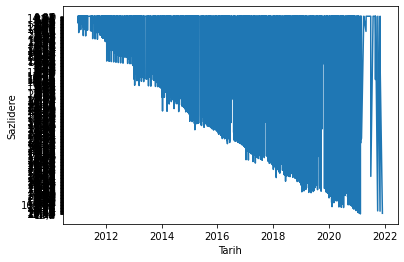

In [263]:
sns.lineplot(x = "Tarih", y = "Sazlidere", data = df_sazlidere)

In [264]:
start_date = pd.to_datetime("2021.03.01")
start_date

Timestamp('2021-03-01 00:00:00')

In [265]:
end_date = pd.to_datetime("2021-09-01")
end_date

Timestamp('2021-09-01 00:00:00')

In [266]:
data = df_sazlidere[(df_sazlidere["Tarih"] >= start_date) & (df_sazlidere["Tarih"] <= end_date)]
data

Tarih Sazlidere
3655 2021-03-01         0
3656 2021-04-01         0
3657 2021-05-01       0,6
3658 2021-06-01         0
3659 2021-07-01         0
3660 2021-08-01         0
3661 2021-09-01         0
3686 2021-03-02         0
3687 2021-04-02         0
3688 2021-05-02         0
3689 2021-06-02         0
3690 2021-07-02         0
3691 2021-08-02         0
3714 2021-03-03      2,02
3715 2021-04-03         0
3716 2021-05-03         0
3717 2021-06-03         0
3718 2021-07-03       6,5
3719 2021-08-03         0

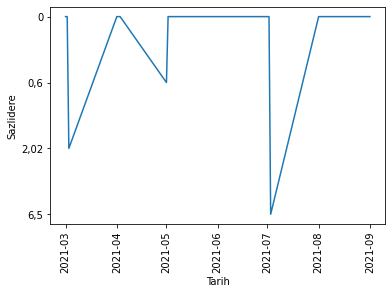

In [267]:
sns.lineplot(x = "Tarih", y = "Sazlidere", data = data);
plt.xticks(rotation=90);

In [268]:
start_date = pd.to_datetime("2011.01.01")
end_date = pd.to_datetime("2011-12-31")
data = df_sazlidere[(df_sazlidere["Tarih"] >= start_date) & (df_sazlidere["Tarih"] <= end_date)]
data

Tarih Sazlidere
0   2011-01-01         0
1   2011-02-01         0
2   2011-03-01      0,87
3   2011-04-01     14,72
4   2011-05-01      4,31
..         ...       ...
360 2011-12-27         0
361 2011-12-28         0
362 2011-12-29         0
363 2011-12-30         0
364 2011-12-31         0

[365 rows x 2 columns]

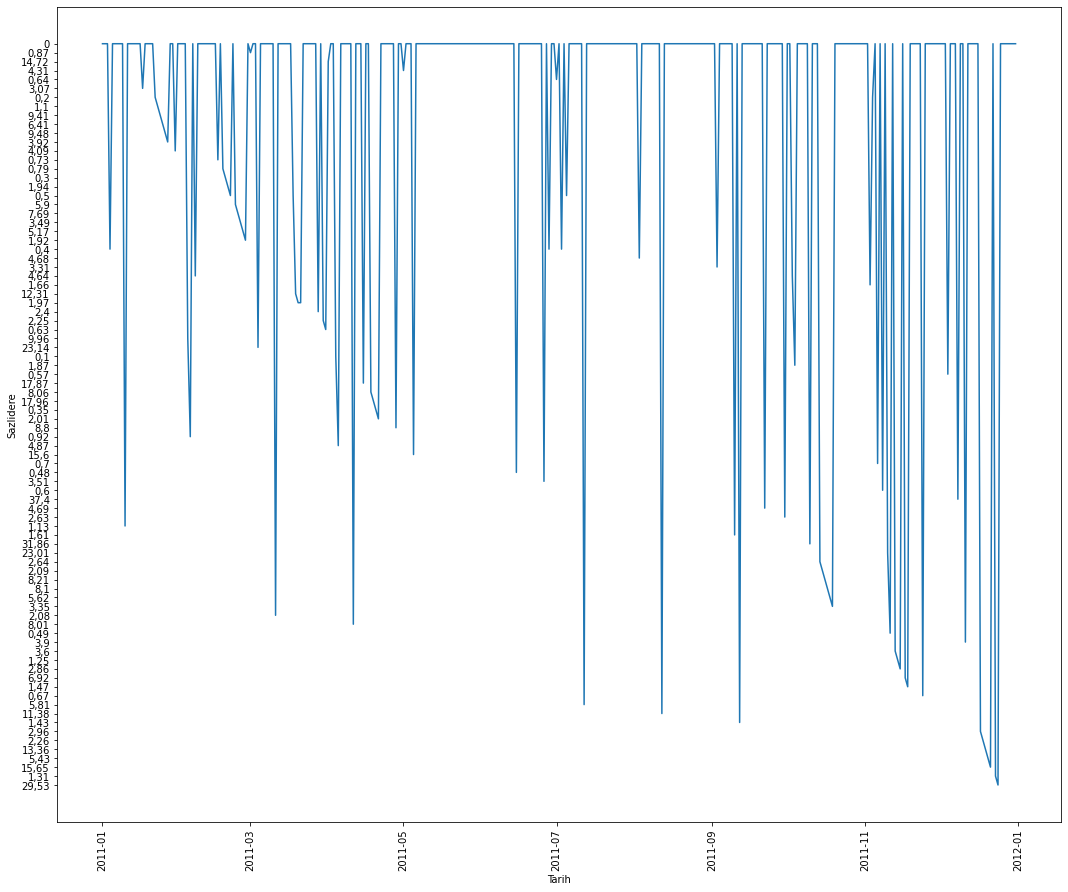

In [269]:
plt.figure(figsize=(18,15))
sns.lineplot(x = "Tarih", y = "Sazlidere", data = data);
plt.xticks(rotation=90);

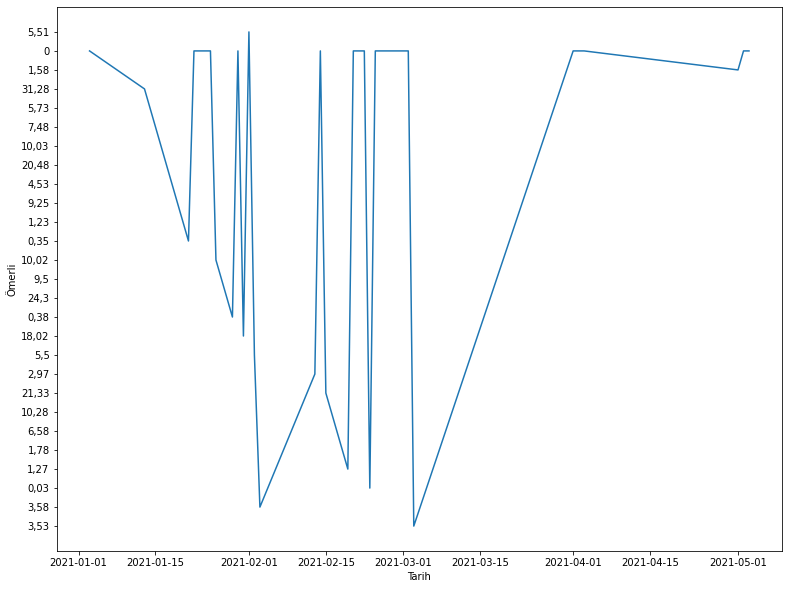

In [270]:
# Tarih sütununu datetime veri tipine dönüştürüldü
df["Tarih"] = pd.to_datetime(df["Tarih"])

# Belirtilen tarih aralığındaki verileri seçildi
start_date = "1.03.2021"
end_date = "5.03.2021"
mask = (df["Tarih"] >= start_date) & (df["Tarih"] <= end_date)
filtered_data = df.loc[mask]

# Sadece bir sütundaki verileri seçildi
selected_column = "Ömerli"
column_data = filtered_data[selected_column]
plt.figure(figsize = (13,10))
# Çizgi grafiği ile sütun verileri gösterildi
sns.lineplot(x=filtered_data["Tarih"], y=column_data)
plt.show()




In [271]:
"""# Belirtilen tarih aralığındaki verileri seçtik
start_date = "2011-01-01"
end_date = "2011-01-07"
mask = (data["Tarih"] >= start_date) & (data["Tarih"] <= end_date)
filtered_data = data.loc[mask]

# İki sütundaki verileri seçtik
column_1 = "Ömerli"
column_2 = "Darlik"

# Çizgi grafiği ile sütun verilerini gösterdik
fig = go.Figure()
fig.add_trace(go.Scatter(x=filtered_data["Tarih"], y=filtered_data[column_1], name=column_1))
fig.add_trace(go.Scatter(x=filtered_data["Tarih"], y=filtered_data[column_2], name=column_2))

fig.update_layout(title="{} - {}".format(start_date, end_date),
                  xaxis_title="Tarih",
                  yaxis_title="Değer")
fig.show()

"""

'# Belirtilen tarih aralığındaki verileri seçtik\nstart_date = "2011-01-01"\nend_date = "2011-01-07"\nmask = (data["Tarih"] >= start_date) & (data["Tarih"] <= end_date)\nfiltered_data = data.loc[mask]\n\n# İki sütundaki verileri seçtik\ncolumn_1 = "Ömerli"\ncolumn_2 = "Darlik"\n\n# Çizgi grafiği ile sütun verilerini gösterdik\nfig = go.Figure()\nfig.add_trace(go.Scatter(x=filtered_data["Tarih"], y=filtered_data[column_1], name=column_1))\nfig.add_trace(go.Scatter(x=filtered_data["Tarih"], y=filtered_data[column_2], name=column_2))\n\nfig.update_layout(title="{} - {}".format(start_date, end_date),\n                  xaxis_title="Tarih",\n                  yaxis_title="Değer")\nfig.show()\n\n'

In [272]:
df["Ömerli"].describe()

count     3723
unique     504
top          0
freq      2677
Name: Ömerli, dtype: object

In [273]:
#2011 yılında Darlik Barajının yağış durumu gösterildi
darlik_2011 = ["Tarih", "Darlik"]
darlik_2011= df.loc[0:360, darlik_2011]
darlik_2011
darlik_2011.groupby('Tarih')['Darlik'].sum().sort_values(ascending=False)
#Darlik barajında 2011 yılında en çok yağışın 19 Mart tarihinde olduğu söylenebilir.


Tarih
2011-03-19    8,73
2011-05-01    8,48
2011-12-21    8,13
2011-12-19    8,13
2011-07-12    7,54
              ... 
2011-05-23       0
2011-05-22       0
2011-05-21       0
2011-05-20       0
2011-12-27       0
Name: Darlik, Length: 361, dtype: object

In [274]:
#Betimsel istatistikler inceleniyor.
darlik_2011.Darlik.agg(['max', 'min','mean']) 
df['Darlik'].describe()

count     3723
unique     690
top          0
freq      2571
Name: Darlik, dtype: object

In [275]:
#Elmali barajında ocak ayı ortalama yağış 
elmali_ortalama = ["Tarih", "Elmali"]
elmali_ortalama = df.loc[365:395, elmali_ortalama]
elmali_ortalama
elmali_data=	[6.99 , 0.4 ,0 ,0, 0, 0,	3.8,	11.12 , 6.05 , 1.45 , 6.37, 7.61,	0,	0,	9.55,	0,	13.6,	0,	0.5,	0,	2.36,	6.89,	0,	0,	2.47,	4.52	,	1.86,	1.5,	6.5,	1,	1.94]
elmali_ortalama= (sum(elmali_data)/31)
elmali_ortalama
#elmali barajında 2012 ocak ayında ortalama yağış 3.11 dir.

3.1122580645161286

In [276]:
data = ["Tarih"	,"Ömerli" , "Darlik",  "Elmali",	"Terkos"	, "B.çekmece",	"Sazlidere",	"Alibey",	"Kazandere"	, "Pabuçdere"]
df.loc[3, data]
# 4 ocaktaki değerler


Tarih        2011-04-01 00:00:00
Ömerli                      8,08
Darlik                     10,01
Elmali                     11,64
Terkos                     18,82
B.çekmece                   9,64
Sazlidere                  14,72
Alibey                      13,5
Kazandere                    8,2
Pabuçdere                  10,37
Name: 3, dtype: object

In [277]:
#2011 4 ocak günü için yağış
data = ["Tarih"	,"Ömerli" , "Darlik",  "Elmali",	"Terkos"	, "B.çekmece",	"Sazlidere",	"Alibey",	"Kazandere"	, "Pabuçdere"]
df.loc[3, data]
ocak = [8.08, 10.01, 11.64, 18.82, 9.64, 14.72, 13.5, 8.2, 10.37]
baraj = [ "Ömerli", "Darlik", "Elmali", "Terkos", "B.çekmece", "Sazlidere", "Alibey", "Kazandere", "Pabuçdere"]


Text(0.5, 1.0, '4 Ocak 2011 Yağış Grafiği')

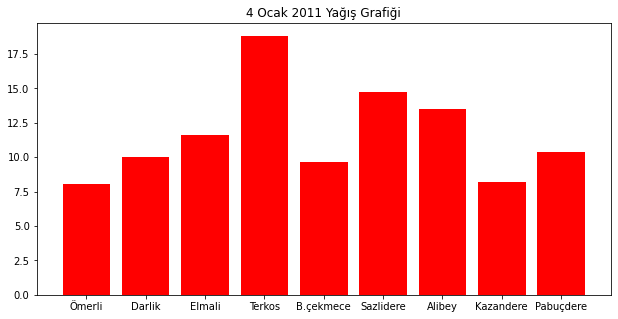

In [278]:
#4 Ocak 2011 İçin Yağış Grafiği
fig = plt.figure(figsize = (35, 5))
ocak_grafik = fig.add_subplot(1,3,1)
ocak_grafik.bar(baraj, ocak, color="red")
ocak_grafik.set_title("4 Ocak 2011 Yağış Grafiği")

Text(0.5, 1.0, '17 Ocak 2011 Yağış Grafiği')

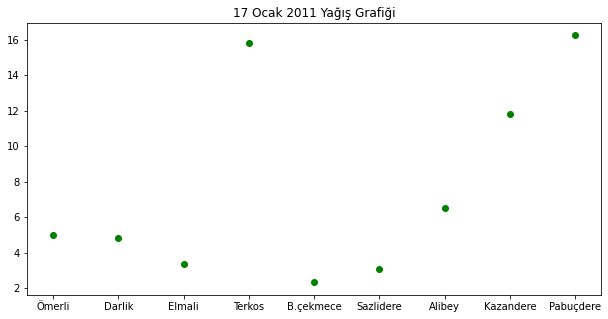

In [279]:
#2011 17 Ocak günü icin yağış
data = ["Tarih"    ,"Ömerli" , "Darlik",  "Elmali",    "Terkos"    , "B.çekmece",    "Sazlidere",    "Alibey",    "Kazandere"    , "Pabuçdere"]
df.loc[16, data]
ocak_17 = [4.98, 4.82, 3.36, 15.82, 2.32, 3.07, 6.51, 11.82, 16.24]
baraj = [ "Ömerli", "Darlik", "Elmali", "Terkos", "B.çekmece", "Sazlidere", "Alibey", "Kazandere", "Pabuçdere"]
fig = plt.figure(figsize = (35, 5))
ocak_grafik_2 = fig.add_subplot(1,3,1)
ocak_grafik_2.scatter(baraj, ocak_17, color="green")
ocak_grafik_2.set_title("17 Ocak 2011 Yağış Grafiği")

In [280]:
# 2019 kasım ortalama
kasım_ortalama = ["Tarih"	,"Ömerli" , "Darlik",  "Elmali",	"Terkos"	, "B.çekmece",	"Sazlidere",	"Alibey",	"Kazandere"	, "Pabuçdere"]
df.loc[3226:3255, kasım_ortalama]
omerli_ortalama = (1.5+ 1.73+ 2.33+ 5.05)/30
darlik_ortalama = (1.64+2.7+ 6.51+ 10.51)/30
elmali_ortalama = (0.39 + 1.7+ 2.1+ 7.1 +11)/30
terkos_ortalama = (3.95+ 1.48+ 8.32+ 13.77)/30
buyukcekmece_ortalama = (1.5 + 2.1+ 3.9+ 1.03)/30
sazlidere_ortalama = (1.9+ 0.4+ 1.4+ 9.2+ 18.31)/30
alibey_ortalama = (0.41+ 0.6+ 6.5+ 4.5)/30
kazandere_ortalama = (2.7+ 6.5+ 42+ 15.4+ 1.2+ 12)/30
pabucdere_ortalama =(2.3+ 9.3+ 35.1+ 11.4+ 2.4+ 16.2)/30
#veriyi inceleyerek 0 değerlerini çıkardım ve her bir baraj için ortalamaları elde ettim.

Text(0.5, 1.0, 'Kasım Ayı Ortalama Yagis Grafigi')

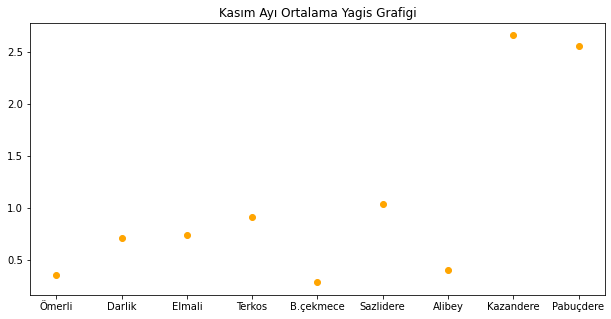

In [281]:
ortalamalar = (omerli_ortalama, darlik_ortalama, elmali_ortalama, terkos_ortalama, buyukcekmece_ortalama, sazlidere_ortalama, alibey_ortalama, kazandere_ortalama, pabucdere_ortalama)
baraj = [ "Ömerli", "Darlik", "Elmali", "Terkos", "B.çekmece", "Sazlidere", "Alibey", "Kazandere", "Pabuçdere"]
#2019 Kasım ayı için ortalama yağışlar
fig = plt.figure(figsize = (35, 5))
kasım_ortalama_grafik = fig.add_subplot(1,3,2)
kasım_ortalama_grafik.scatter(baraj, ortalamalar , color ="orange")
kasım_ortalama_grafik.set_title("Kasım Ayı Ortalama Yagis Grafigi")
#Kasım ayı ortalama yağışlarına baktığımızda en çok Kazandere ve Pabuçdere barajlarında en az ise Büyükçekmece ve Ömerli barajlarında olduğunu söylenebilir.

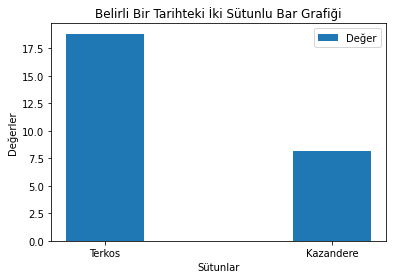

In [282]:
import matplotlib.pyplot as plt
import numpy as np
#4 Nisan
# Veriler tanımlanıyor.
sutunlar = ['Terkos', 'Kazandere']
y1 = [18.82, 8.2] # İlk değerler

bar_width = 0.34

# Grafik oluşturuluyor
fig, ax = plt.subplots()
bar1 = ax.bar(sutunlar, y1, bar_width, label='Değer')

ax.set_xlabel('Sütunlar')
ax.set_ylabel('Değerler')
ax.set_title('Belirli Bir Tarihteki İki Sütunlu Bar Grafiği')
ax.legend()

plt.show()